<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:blue;text-align:center">Lógica para Ciencias de la Computación</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Taller</p></tp>
            <tp><p style="font-size:150%;text-align:center">Implementación de tablas de verdad</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Objetivos <a class="anchor" id="inicio"></a>

El primer objetivo de este taller es familiarizarnos con el álgebra booleana incorporada en Python. Luego, mediante nuestras fórmulas y funciones recursivas, explicaremos cómo ocurre la evaluación de operaciones booleanas. Más aún, mostraremos cómo construir fórmulas arbitrariamente grandes y complejas mediante una función que toma una cadena y crea un objeto de clase `Formula`. Este truco resultará muy útil cuando usemos la lógica para representar problemas.

[Ir al ejercicio 1](#ej1)

# Secciones

1. [Algebra booleana en python.](#alg)
2. [Funciones de interpretación como diccionarios.](#funs)
3. [El método de evaluación de fórmulas.](#eval)
4. [De cadenas a fórmulas.](#inorder)
6. [Comparación empírica de tiempos (opcional).](#comp)

# Álgebra booleana en python <a class="anchor" id="alg"></a>

([Volver al inicio](#inicio))

Python implementa las dos constantes `True` y `False`, mediante las cuales es posible definir variables booleanas: 

In [1]:
p = True
q = False

Estas constantes y variables pueden manipularse mediante la operación unaria `not` y las operaciones binarias `and` y `or`:

In [2]:
print(not p)
print(p and q)
print(p or q)

False
False
True


Podemos verificar el funcionamiento de estas operaciones haciendo la evaluación sobre todos los valores posibles de sus argumentos (esto es lo que se conoce como la **tabla de verdad** de los conectivos lógicos):

In [3]:
from itertools import product

interpretaciones = list(product([True,False], repeat=2))
interpretaciones

[(True, True), (True, False), (False, True), (False, False)]

In [4]:
print('-'*13)
print('p     not p')
print('-'*13)
for p in [True, False]:
    espacio1 = '  ' if p else ' '
    print(f'{p}{espacio1}{not p}')

print('')
print('-'*20)
print('p     q     p and q')
print('-'*20)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    espacio1 = '  ' if p else ' '
    espacio2 = '  ' if q else ' '
    print(f'{p}{espacio1}{q}{espacio2}{p and q}')
    
print('')
print('-'*20)
print('p     q     p or q')
print('-'*20)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    espacio1 = '  ' if p else ' '
    espacio2 = '  ' if q else ' '
    print(f'{p}{espacio1}{q}{espacio2}{p or q}')

-------------
p     not p
-------------
True  False
False True

--------------------
p     q     p and q
--------------------
True  True  True
True  False False
False True  False
False False False

--------------------
p     q     p or q
--------------------
True  True  True
True  False True
False True  True
False False False


<a class="anchor" id="ej1"></a>**Ejercicio 1:** 

([Próximo ejercicio](#ej2))

Encuentre todas las posibles interpretaciones para tres variables booleanas `p`, `q`, `r`.

In [5]:
interpretaciones = list(product([True,False], repeat=3))
interpretaciones

[(True, True, True),
 (True, True, False),
 (True, False, True),
 (True, False, False),
 (False, True, True),
 (False, True, False),
 (False, False, True),
 (False, False, False)]

---

Observe que una variable como `p and q or r` es ambigua. Es decir, ¿su evaluación es de la forma `(p and q) or r` o de la forma `p and (q or r)`?

In [6]:
p = True
q = False
r = True

In [7]:
p and q or r

True

Python no tiene problema en operar sin paréntesis. Básicamente, porque está dando prioridad a alguna de las dos operaciones. O bien `and` siempre va primero, o bien `or` siempre va primero. Tratemos de encontrar empíricamente cuál operación tiene prioridad:

In [8]:
print('Dando prioridad a and')
print('-'*36)
print('p     q       r      (p and q) or r')
print('-'*36)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    r = I[2]
    espacio1 = '  ' if p else ' '
    espacio2 = '    ' if q else '   '
    espacio3 = '    ' if r else '   '
    print(f'{p}{espacio1}{q}{espacio2}{r}{espacio3}{(p and q) or r}')

print('')
print('Dando prioridad a or')
print('-'*36)
print('p     q       r       p and (q or r)')
print('-'*36)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    r = I[2]
    espacio1 = '  ' if p else ' '
    espacio2 = '    ' if q else '   '
    espacio3 = '    ' if r else '   '
    print(f'{p}{espacio1}{q}{espacio2}{r}{espacio3}{p and (q or r)}')

print('')
print('Prioridad de Python')
print('-'*36)
print('p     q       r       p and q or r')
print('-'*36)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    r = I[2]
    espacio1 = '  ' if p else ' '
    espacio2 = '    ' if q else '   '
    espacio3 = '    ' if r else '   '
    print(f'{p}{espacio1}{q}{espacio2}{r}{espacio3}{p and q or r}')



Dando prioridad a and
------------------------------------
p     q       r      (p and q) or r
------------------------------------
True  True    True    True
True  True    False   True
True  False   True    True
True  False   False   False
False True    True    True
False True    False   False
False False   True    True
False False   False   False

Dando prioridad a or
------------------------------------
p     q       r       p and (q or r)
------------------------------------
True  True    True    True
True  True    False   True
True  False   True    True
True  False   False   False
False True    True    False
False True    False   False
False False   True    False
False False   False   False

Prioridad de Python
------------------------------------
p     q       r       p and q or r
------------------------------------
True  True    True    True
True  True    False   True
True  False   True    True
True  False   False   False
False True    True    True
False True    False   False
F

Vemos que la primera y tercera tablas son iguales, lo que quiere decir que la evaluación de `(p and q) or r` y `p and q or r` dan como resultado el mismo valor de verdad para cualquier combinación de valores de las letras `p` y `q`. Esto implica, naturalmente, que la inclusión de los paréntesis en la primera variable no influye en la evaluación de su valor de verdad. Podemos concluir que Python da prioridad a `and` sobre `or`, es decir, primero evalúa los `and` y, una vez todos han sido resueltos, evalúa los `or`.

En general se tiene que:

**Las prioridades de python son** `not` **sobre** `and` **sobre** `or`.

---

<a class="anchor" id="ej2"></a>**Ejercicio 2:** 

([Anterior ejercicio](#ej1)) ([Próximo ejercicio](#ej3))

Adapte el procedimiento usado anteriormente para encontrar que `and` tiene prioridad sobre `or`, pero esta vez para verificar que `not` tiene mayor prioridad que `and`. 

In [9]:
interpretaciones = list(product([True,False], repeat=2))

print('Dando prioridad a and')
print('-'*36)
print('p     q       not (p and q)')
print('-'*36)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    espacio1 = '  ' if p else ' '
    espacio2 = '    ' if q else '   '
    print(f'{p}{espacio1}{q}{espacio2}{not(p and q)}')

print('')
print('Dando prioridad a not')
print('-'*36)
print('p     q       (not p) and q')
print('-'*36)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    espacio1 = '  ' if p else ' '
    espacio2 = '    ' if q else '   '
    print(f'{p}{espacio1}{q}{espacio2}{(not p) and q}')

print('')
print('Prioridad de Python')
print('-'*36)
print('p     q       not p and q')
print('-'*36)
for I in interpretaciones:
    p = I[0]
    q = I[1]
    espacio1 = '  ' if p else ' '
    espacio2 = '    ' if q else '   '
    print(f'{p}{espacio1}{q}{espacio2}{not p and q}')



Dando prioridad a and
------------------------------------
p     q       not (p and q)
------------------------------------
True  True    False
True  False   True
False True    True
False False   True

Dando prioridad a not
------------------------------------
p     q       (not p) and q
------------------------------------
True  True    False
True  False   False
False True    True
False False   False

Prioridad de Python
------------------------------------
p     q       not p and q
------------------------------------
True  True    False
True  False   False
False True    True
False False   False


---

Como pudimos ver, Python ya tiene incorporada el álgebra booleana. Las variables de esta álgebra son lo que nosotros hemos definido como fórmulas de la lógica proposicional, y las operaciones booleanas son lo que nosotros llamamos conectivos lógicos (o constantes lógicas).

En este curso no usaremos mucho esta álgebra booleana de Python, sino que iremos mucho más allá, por varias razones. La primera es que queremos abrir la caja negra de la evaluación de operaciones booleanas. ¿Cómo se obtiene el valor de una variable booleana compleja, p.ej., `not (p and q) or r`? 

En segundo lugar, queremos crear de manera algorítmica fórmulas de gran tamaño y gran complejidad, las cuales usaremos en nuestros ejercicios de representación de problemas. Python no presenta una manera fácil de creación algorítmica de variables. Nosotros veremos una manera muy sencilla de crear fórmulas a partir de cadenas.

Finalmente, en tercer lugar, durante el curso vamos a implementar varios métodos para buscar modelos de una fórmula arbitrariamente grande y compleja. 

---

# Funciones de interpretación como diccionarios <a class="anchor" id="funs"></a>

([Volver al inicio](#inicio))

Vamos a ver ahora cómo implementar las funciones de interpretación y la manera de evaluar el valor de verdad de una fórmula. Comenzamos usando diccionarios para implementar las funciones de interpretación, es decir, aquellas que dan valores de verdad a las letras proposicionales:

In [10]:
I = {'p':True, 'q':False}
print(I['p'])
print(I['q'])

True
False


Si queremos incluir el valor de una nueva letra proposicional, podemos simplemente aumentar el diccionario:

In [11]:
I['r'] = True
I['r']

True

---

# El método de evaluación de fórmulas <a class="anchor" id="eval"></a>

([Volver al inicio](#inicio))

Ya hemos visto cómo implementar las funciones de interpretación. Ahora vamos a ver cómo usarlas para darle un valor de verdad a una fórmula.

Comenzamos por incluir la clase `Formula` y sus subclases:

In [12]:
class Formula :
    
    def __init__(self) :
        pass

    def __str__(self) :
        if type(self) == Letra:
            return self.letra
        elif type(self) == Negacion:
            return '-' + str(self.subf)
        elif type(self) == Binario:
            return "(" + str(self.left) + self.conectivo + str(self.right) + ")"
    
    def letras(self):
        if type(self) == Letra:
            return set(self.letra)
        elif type(self) == Negacion:
            return self.subf.letras()
        elif type(self) == Binario:
            return self.left.letras().union(self.right.letras())

class Letra(Formula) :
    def __init__ (self, letra:str) :
        self.letra = letra
           
class Negacion(Formula) :    
    def __init__(self, subf:Formula) : 
        self.subf = subf
        
class Binario(Formula) :
    def __init__(self, conectivo:str, left:Formula, right:Formula) :
        assert(conectivo in ['Y','O','>','='])
        self.conectivo = conectivo
        self.left = left
        self.right = right



Ahora bien, evaluar el valor de verdad de una fórmula dado un valor de verdad para cada una de sus letras proposicionales, se realiza mediante una función recursiva. En las diapositivas de clase hay un ejemplo explicado en detalle. Esta función la incluimos como un método de la clase `Formula`:

In [17]:
def valor(self, I) :
    if type(self) == Letra:
        return I[self.letra]
    elif type(self) == Negacion:
        return not self.subf.valor(I)
    elif type(self) == Binario:
        if self.conectivo == 'Y':
            return self.left.valor(I) and self.right.valor(I)
        if self.conectivo == 'O':
            return self.left.valor(I) or self.right.valor(I)
        if self.conectivo == '>':
            return not self.left.valor(I) or self.right.valor(I)
        if self.conectivo == '=':
            return (self.left.valor(I) and self.right.valor(I)) or (not self.left.valor(I) and not self.right.valor(I)) 

setattr(Formula, "valor", valor)

Veámos cómo funciona en un par de casos:

In [20]:
# Creamos las fórmulas
p = Letra('p')
q = Letra('q')
r = Letra('r')
s = Letra('s')
A1 = Negacion(p)
A2 = Binario('>', p, q)
A3 = Negacion(A2)
A4 = Binario('=', Negacion(q), A3)

# Visualizamos la notación inorder de las fórmulas
# con su respectivo valor de verdad dada la interpretación I
I = {'p':True, 'q':False}
print(f'{p} tiene el valor {p.valor(I)}')
print(f'{q} tiene el valor {q.valor(I)}')
print(f'{A1} tiene el valor {A1.valor(I)}')
print(f'{A2} tiene el valor {A2.valor(I)}')
print(f'{A3} tiene el valor {A3.valor(I)}')
print(f'{A4} tiene el valor {A4.valor(I)}')

p tiene el valor True
q tiene el valor False
-p tiene el valor False
(p>q) tiene el valor False
-(p>q) tiene el valor True
(-q=-(p>q)) tiene el valor True


<a class="anchor" id="ej3"></a>**Ejercicio 3:** 

([Anterior ejercicio](#ej2)) ([Próximo ejercicio](#ej4))

Verifique la implementación del método $\texttt{valor}()$ con las siguientes fórmulas usando el siguiente diccionario `I`:

`I = {'p':False, 'q':True, 'r':True, 's':False}`

* $p\wedge\neg q$ $=>$ False
* $(\neg r\vee\neg p)\to q$ $=>$ True
* $(s\vee\neg r)\to(p\wedge\neg q)$ $=>$ True
* $(r\wedge\neg s)\to (\neg s\vee (\neg r\vee\neg p))$ $=>$ True
* $((r\wedge\neg s)\to (\neg s\vee (\neg r\vee\neg p)))\to (\neg s\vee (\neg r\vee\neg p))$ $=>$ True

**Nota:** El valor a la derecha del símbolo '$=>$' hace referencia al resultado correcto.


In [33]:
f1 = Binario('Y', p, Negacion(q))
f2 = Binario('>',Binario('O',Negacion(r),Negacion(p)),q)
f3 = Binario('>',Binario('O',s,Negacion(r)),Binario('Y',p,Negacion(q)))
f4 = Binario('>',Binario('Y',r,Negacion(s)),Binario('O',Negacion(s),Binario('O',Negacion(r),Negacion(p))))
f5 = Binario('>',Binario('>',Binario('Y',r,Negacion(s)),Binario('O',Negacion(s),Binario('O',Negacion(r),Negacion(p)))),Binario('O',Negacion(s),Binario('O',Negacion(r),Negacion(p))))

formulas=[f1,f2,f3,f4,f5]
I = {'p':False, 'q':True, 'r':True, 's':False}

for f in formulas:
    print (f'{f}=>{f.valor(I)}')

(pY-q)=>False
((-rO-p)>q)=>True
((sO-r)>(pY-q))=>True
((rY-s)>(-sO(-rO-p)))=>True
(((rY-s)>(-sO(-rO-p)))>(-sO(-rO-p)))=>True


---

<a class="anchor" id="ej4"></a>**Ejercicio 4:** 

([Anterior ejercicio](#ej3))

Implemente una función que determine cuáles, dentro de todas las posibles interpretaciones de una fórmula, hacen que sea verdadera. Verifique su implementación con las siguientes fórmulas:

* $\neg p\wedge q\quad=>\quad$  únicamente `I = {'p':False, 'q':True}`
* $p\to(\neg p\to q)\quad=>\quad$ Todas las interpretaciones
* $\bigl(\neg p\wedge (\neg p\to \neg q)\bigr)\wedge q\quad=>\quad$ Ninguna interpretación



In [34]:
interpretaciones = list(product([True,False], repeat=2))

dic=[]
letras=['p','q']

for I in interpretaciones:
    for a in I:
        for b in I:
            dic.append({'p':a,'q':b})
            
lista_sin_repetidos = []
for item in dic:
    if item not in lista_sin_repetidos:
        lista_sin_repetidos.append(item)
        
dic=lista_sin_repetidos

for i in dic:
    if f1.valor(i)==True: print(i)
        
        

{'p': True, 'q': False}


# De cadenas a fórmulas <a class="anchor" id="inorder"></a>

([Volver al inicio](#inicio))

Todo esto está muy bien, pero ¿por qué tanto alboroto si Python ya tiene incorporada el álgebra booleana? (también está esta excelente [librería](https://docs.sympy.org/latest/modules/logic.html)).

Lo primero que hemos logrado hasta ahora es, por así decirlo, abrir la caja negra de cómo hace Python para evaluar una variable booleana. Ahora vamos a ver cómo construir fórmulas a partir de cadenas. Esto no es tan fácil de realizar en Python, pero es muy importante para nosotros, toda vez que vamos a necesitar construir fórmulas grandes y complejas para la representación de problemas. 

La solución a este desafío de construir grandes y complejas fórmulas tiene como primer paso la construcción de una fórmula como una cadena (es decir, de tipo `string`). Más adelante dedicaremos nuestras energías a la construcción de estas fórmulas como cadenas. Lo importante ahora es ver que podemos tomar una fórmula como cadena y construir una fórmula como objeto.

La siguiente función toma una cadena y devuelve un objeto de clase `Formula`. La explicación con ejemplos se encuentra en las diapositivas de clase:

In [35]:
def inorder_to_tree(cadena:str):
    conectivos = ['Y', 'O', '>', '=']
    if len(cadena) == 1:
        assert(cadena not in conectivos), '¡Cadena inválida'
        return Letra(cadena)
    elif cadena[0] == '-':
        return Negacion(inorder_to_tree(cadena[1:]))
    elif cadena[0] == "(":
        counter = 0 #Contador de parentesis
        for i in range(1, len(cadena)):
            if cadena[i] == "(":
                counter += 1
            elif cadena[i] == ")":
                counter -=1
            elif cadena[i] in conectivos and counter == 0:
                return Binario(cadena[i], inorder_to_tree(cadena[1:i]),inorder_to_tree(cadena[i + 1:-1]))
    else:
        raise Exception('¡Cadena inválida!')

In [36]:
prueba1 = "(-p>((pY-q)>(pYq)))"
prueba2 = "(-pOq)"
prueba3 = "(pY-q)"

Tree = inorder_to_tree(prueba1)
Tree2 = inorder_to_tree(prueba2)
Tree3 = inorder_to_tree(prueba3)

print(Tree)
print(Tree2)
print(Tree3)

(-p>((pY-q)>(pYq)))
(-pOq)
(pY-q)


---

# Sección opcional: Comparación empírica de tiempos <a class="anchor" id="comp"></a>


([Volver al inicio](#inicio))

La eficiencia de los algoritmos es un tema central en la ciencia de la computación. Esta eficiencia se estudia usalmente de manera teórica, respecto al tiempo y memoria que consume una implementación computacional al correr un algoritmo respecto a varios tipos de entradas. En este curso seguiremos un enfoque empírico para evaluar la eficiencia de los algoritmos. Este enfoque no reemplaza el teórico y es sólo una aproximación al mismo. 

Lo que deseamos hacer es evaluar los tiempos que le lleva al computador ejecutar alguno de nuestros algoritmos sobre una colección de entradas. En este caso particular, como tenemos dos funciones que realizan el mismo procedimiento, resulta interesante evaluar de manera empírica cuál de las dos es más rápida. 

Observe que medir los tiempos del computador no es el enfoque más apropiado para considerar la eficiencia, pero de todas maneras resulta útil. Para realizar esto debemos tener presente que el computador es una pieza de hardware cuyos tiempos de funcionamiento dependen de muchas cosas (nivel de energía, estado del hardware, etc.). Además, un computador realiza muchas tareas al mismo tiempo. En consecuencia, medir los tiempos del computador para evaluar una función requiere tratar de cancelar todo este ruido alrededor. Una manera de hacerlo es obtener varias mediciones del mismo proceso, y luego comparar promedios de tiempos. Esto es lo que realizaremos a continuación. 

Creamos primero una función que obtiene una lista con varias mediciones del tiempo de ejecución de una función. Analice la siguiente celda hasta que se sienta satisfecho con su comprensión del código:

In [37]:
from time import time

def obtiene_tiempos(fun, args, num_it=100):
    tiempos_fun = []
    for i in range(num_it):
        arranca = time()
        x = fun(*args)
        para = time()
        tiempos_fun.append(para - arranca)
    return tiempos_fun

Ahora debemos considerar la evaluación del valor de verdad de una variable booleana como una función cuyo argumento son valores de verdad:

In [38]:
vals = [True, False, True]
fun1 = lambda p, q, r: not (p and q) or r

También debemos ver el método `valor` de las fórmulas como una función que toma como argumento una fórmula y una función de interpretación: 

In [39]:
cadena = '(-(pYq)Or)'
A = inorder_to_tree(cadena)
I = {'p':True, 'q':False, 'r':True}
fun2 = lambda A, I: A.valor(I)

Ahora creamos una función que compare estos tiempos, nos presente un histograma de ellos y realice la prueba estadística de diferencia de medias:

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from numpy import mean

def compara_funciones(fun1, fun2, args1, args2, N=100, equal_var=False):
    t1 = obtiene_tiempos(fun1, args1, N)
    t2 = obtiene_tiempos(fun2, args2, N)
    fig, ax = plt.subplots(1,2, figsize=(6,3), tight_layout=True)
    sns.histplot(t1, kde=True, ax=ax[0])
    sns.histplot(t2, kde=True, ax=ax[1])
    max1 = ax[0].get_xlim()[1]
    max2 = ax[1].get_xlim()[1]
    maximo = max(max1, max2)
    ax[0].set_xlim(0,maximo)
    ax[1].set_xlim(0,maximo)
    print(f'tiempo promedio fun1: {mean(t1)}')
    print(f'tiempo promedio fun2: {mean(t2)}')
    print('H0: t1 == t2')
    t, p = ttest_ind(t1, t2, equal_var=equal_var)
    print(f't: {t}')
    print(f'valor p: {p}')
    plt.show()

tiempo promedio fun1: 0.0
tiempo promedio fun2: 1.0001659393310548e-05
H0: t1 == t2
t: -1.0000000000000004
valor p: 0.31974847413930163


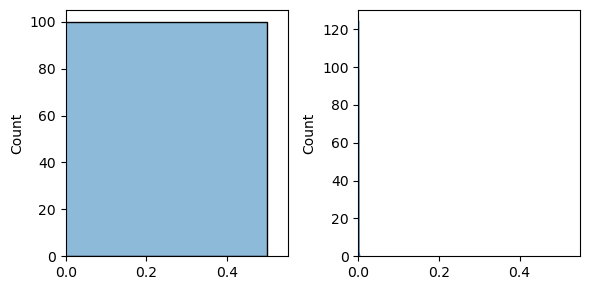

In [41]:
compara_funciones(fun1, fun2, vals, [A,I])

Con este sencillo ejercicio podemos ver que la evaluación de variables booleanas nativa de Python es más rápida que nuestro método `valor` para fórmulas. 

A pesar de ello, las diferencias no son muy considerables y el beneficio que obtenemos con nuestras fórmulas sobrepasa este pequeño costo en tiempos de ejecución. 

---